In [35]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

import numpy as np

PLAN:
Use historical data to fine-tune parameters for baseline model (with both WWI and Spanish Flu)
Use Modified data (Linear fit for life expectancy and birth rate, removing data points from 1910-1920) to generate a control model without the war or flu
Isolate effects of WWI and Spanish flu by increasing death rates / decreasing birth rates within different age groups for each respective event

In [36]:
#population of italy (millions) 1900 to 1949 
#http://www.populstat.info/Europe/italyc.htm
pop = [32.4750, 32.0454, 32.5956, 32.9612, 33.2183, 
       33.4761, 33.7332, 33.6407, 33.9098, 34.2698,
       34.5652, 35.1318, 35.2390, 35.5978, 36.1201,
       36.5464, 36.6024, 36.5829, 36.3700, 37.8370,
       38.7560, 38.7900, 39.1360, 39.4010, 39.6930,
       39.5846, 39.6810, 40.0540, 40.4450, 40.7030,
       41.1767, 41.5800, 41.9300, 41.8060, 42.2170,
       42.4446, 43.5780, 43.8430, 44.3940, 43.7870,
       44.8300, 45.3870, 48.8300, 44.9400, 45.4150, 
       45.3800, 45.7200, 46.3810, 46.7330, 46.1040]
#life expectancy
#https://en.wikipedia.org/wiki/Demographics_of_Italy
lifexp = [43.5, 43.0, 43.1, 44.4, 43.9, 45.2, 45.4, 43.1, 44.6, 46.7,
          44.7, 48.9, 48.4, 49.9, 42.5, 39.6, 38.1, 25.8, 42.3, 45.5,
          49.2, 50.0, 51.4, 51.5, 51.3, 50.9, 52.5, 52.6, 52.3, 55.2,
          54.8, 54.7, 56.3, 56.8, 56.2, 56.7, 55.5, 56.1, 57.6, 57.0,
          54.7, 52.5, 49.4, 52.4, 54.9, 59.0, 61.2, 63.4, 64.1, 65.8]
t = 1900 + linspace(0,49,50)


array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926.,
       1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935.,
       1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944.,
       1945., 1946., 1947., 1948., 1949.])

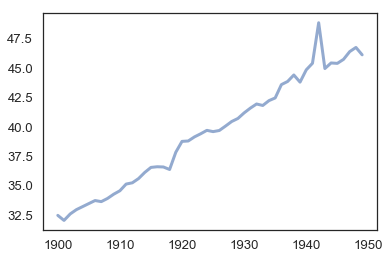

In [37]:
#plot italy pop data
plot(t,pop)

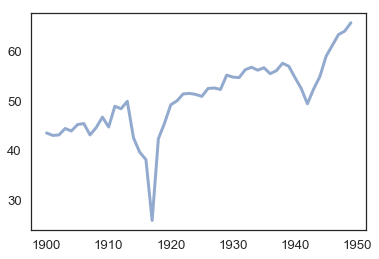

In [38]:
#plot italy life expectancy data
plot(t,lifexp)

Life expectancy =  0.4009603841536642  * year -  721.1562593037269


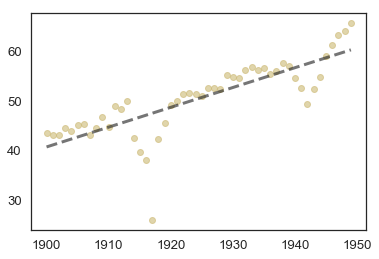

In [39]:
#to get a baseline life expectancy (no disease or war)
#eliminate data points that exhibit a drop

# **TODO** Actually do that
modlifexp = [43.5, 43.0, 43.1, 44.4, 43.9, 45.2, 45.4, 43.1, 44.6, 46.7,
          44.7, 48.9, 48.4, 49.9, 42.5, 39.6, 38.1, 25.8, 42.3, 45.5,
          49.2, 50.0, 51.4, 51.5, 51.3, 50.9, 52.5, 52.6, 52.3, 55.2,
          54.8, 54.7, 56.3, 56.8, 56.2, 56.7, 55.5, 56.1, 57.6, 57.0,
          54.7, 52.5, 49.4, 52.4, 54.9, 59.0, 61.2, 63.4, 64.1, 65.8]

#assume linear increase of life expectancy
m,b = np.polyfit(t, lifexp, 1) 

plot(t,lifexp, 'yo')
plot(t, m*t+b, '--k') 
print('Life expectancy = ',m,' * year - ', -b)

#From linear life expectancy...
#Dramatically drop life expectancy/birthrate in different age groups over a short period of time
#To Isolate effects of disesase/war

In [ ]:
# **TODO**
#Generate linear birthrate model from birth data
#https://en.wikipedia.org/wiki/Demographics_of_Italy#Vital_statistics_since_1900[34][35][36]
#Get baseline by scrubbing outliers

In [40]:
#young 0-15
#mid 16-39
#old 40-life expectancy
#ASSUMPTION: Each Age is equally likely
#Mature rate young to 
MATURE1 = 1/16
MATURE2 = 1/24
#death = 1/(lifexp[t]-40)
p_0 = pop[0]
yng_0 = p_0 * 1/(MATURE1*42)
mid_0 = p_0 * 1/(MATURE2*42)
old_0 = p_0 * 2/42
#Birthrate = birthrate[t] (generate linear birthrate model from data)

1.5464285714285715

In [42]:
#TIMESTEP

#delta young = young pop*MATURE1
#delta mid = mid pop*MATURE2
#delta old = old pop * death[t]
#Young population increases by pop*birthrate[t]
#delta young moves from young to mid
#delta mid moves from mid to old
#old decreases by delta old
#pop = young plus old plus mid